In [1]:
import keras
import tensorflow as tf
from keras import backend as K

导入数据

In [2]:
from keras import datasets

In [3]:
# 从自带数据集载入数据
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
# 将数据reshape并缩放
x_train = x_train.reshape((-1,28*28))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((-1,28*28))
x_test = x_test.astype('float32') / 255

11493376/11490434 [==============================] - 11s 1us/step


In [4]:
from keras import utils

In [5]:
# 将标签转换为onehot编码
y_train = utils.to_categorical(y_train,num_classes=10)
y_test = utils.to_categorical(y_test,num_classes=10)

In [6]:
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

x_train.shape: (60000, 784)
y_train.shape: (60000, 10)
x_test.shape: (10000, 784)
y_test.shape: (10000, 10)


构建模型

In [7]:
from keras import models,layers

In [8]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


训练模型

In [9]:
history = model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2726 - acc: 0.9225 - val_loss: 0.1310 - val_acc: 0.9625
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1107 - acc: 0.9677 - val_loss: 0.0883 - val_acc: 0.9744
Epoch 3/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0723 - acc: 0.9788 - val_loss: 0.0785 - val_acc: 0.9763
Epoch 4/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0508 - acc: 0.9851 - val_loss: 0.0715 - val_acc: 0.9778
Epoch 5/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0371 - acc: 0.9888 - val_loss: 0.0667 - val_acc: 0.9789


评估模型

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

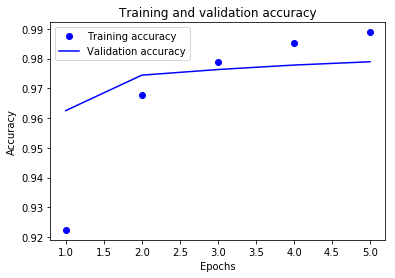

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
model.evaluate(x_train,y_train)

60000/60000 [==============================] - 2s 26us/step


[0.028737037641291197, 0.9921]

In [13]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 27us/step


[0.06674766805942636, 0.9789]

保存模型

In [14]:
model.save('model/mnist.h5')

In [15]:
del model

In [17]:
# 恢复模型结构及权重
model = models.load_model('model/mnist.h5')
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 28us/step


[0.06674766805942636, 0.9789]